In [2]:
# Importar las librerías necesarias
# Manejo de datos
import numpy as np

# Guardar y cargar modelos
import joblib

# Usar el KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [11]:
# Definir el número de vecinos
k = 1150

## MFCC

In [ ]:
# Cargar los datos de entrenamiento
y_train_mfcc = np.load('data_preprocessed/y_train_mfcc.npy')

# Cargar los datos de prueba
y_test_mfcc = np.load('data_preprocessed/y_test_mfcc.npy')

# Cargar los datos no escalados
X_train_mfcc = np.load('data_preprocessed/X_train_mfcc.npy')
X_test_mfcc = np.load('data_preprocessed/X_test_mfcc.npy')

# Cargar los datos ya escalados
# X_train_mfcc = np.load('data_preprocessed/scalers_PCA/X_train_mfcc_scaled.npy')
# X_test_mfcc = np.load('data_preprocessed/scalers_PCA/X_test_mfcc_scaled.npy')

In [13]:
# Crear y entrenar el modelo KNN
knn_mfcc = KNeighborsClassifier(n_neighbors=k)
knn_mfcc.fit(X_train_mfcc, y_train_mfcc)

# Predecir en el conjunto de prueba
y_pred_mfcc = knn_mfcc.predict(X_test_mfcc)

# Evaluar el modelo
print("KNN con MFCC - Precisión en prueba:", accuracy_score(y_test_mfcc, y_pred_mfcc))
print("Reporte de clasificación (KNN con MFCC):")
print(classification_report(y_test_mfcc, y_pred_mfcc))

# Guardar el modelo KNN con MFCC
joblib.dump(knn_mfcc, f'models/KNN/knn_mfcc_model_k{k}.pkl')

KNN con MFCC - Precisión en prueba: 0.7429866206301252
Reporte de clasificación (KNN con MFCC):
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      2264
           1       0.71      0.84      0.77      2370

    accuracy                           0.74      4634
   macro avg       0.75      0.74      0.74      4634
weighted avg       0.75      0.74      0.74      4634



['models/KNN/knn_mfcc_model_k1150.pkl']

En el escalado a mayor K se observa mayor precisión en la clasificación, sin embargo, se observa que a partir de K=75 la precisión cae. (La más alta en K=75 -> 0.64005)

En el NO escalado a mayor K se observa mayor precisión en la clasificación, sin embargo, se observa que a partir de K=1150 la precisión cae. (La más alta en K=1150 -> 0.74298)  

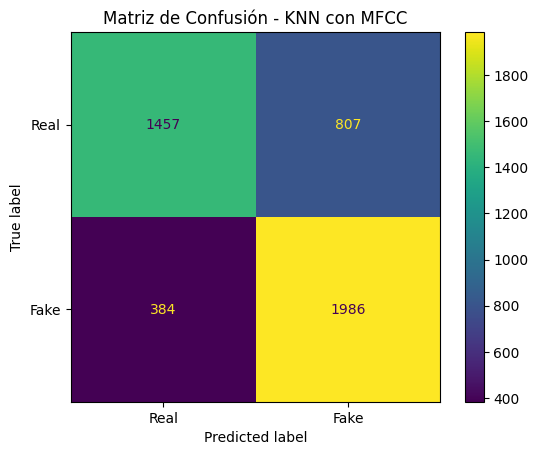

In [14]:
# Matriz de confusión - KNN con MFCC
cm_mfcc = confusion_matrix(y_test_mfcc, y_pred_mfcc)
disp_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc, display_labels=['Real', 'Fake'])
disp_mfcc.plot()
plt.title('Matriz de Confusión - KNN con MFCC')
plt.show()

## Spectrogram

No se ha implementado ya que pesa considerablemente más que el MFCC y en pruebas previas no se ha determinado una mejora significativa en la precisión.

El código presentado a continuación funciona con el espectrograma, pero no se ha ejecutado por carga computacional.

In [ ]:
# Cargar los datos de entrenamiento
y_train_spectrogram = np.load('data_preprocessed/y_train_spectrogram.npy')

# Cargar los datos de prueba
y_test_spectrogram = np.load('data_preprocessed/y_test_spectrogram.npy')

# Cargar los datos con PCA ya aplicado 
X_train_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_train_spectrogram_pca.npy')
X_test_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_test_spectrogram_pca.npy')

In [ ]:
# Crear y entrenar el modelo KNN
knn_spectrogram = KNeighborsClassifier(n_neighbors=k)
knn_spectrogram.fit(X_train_spectrogram_pca, y_train_spectrogram)

# Predecir en el conjunto de prueba
y_pred_spectrogram = knn_spectrogram.predict(X_test_spectrogram_pca)

# Evaluar el modelo
print("KNN con Espectrograma - Precisión en prueba:", accuracy_score(y_test_spectrogram, y_pred_spectrogram))
print("Reporte de clasificación (KNN con Espectrograma):")
print(classification_report(y_test_spectrogram, y_pred_spectrogram))

# Guardar el modelo KNN con espectrogramas
joblib.dump(knn_spectrogram, 'models/KNN/knn_spectrogram_model.pkl')

In [ ]:
# Matriz de confusión - KNN con Espectrograma

cm_spectrogram = confusion_matrix(y_test_spectrogram, y_pred_spectrogram)
disp_spectrogram = ConfusionMatrixDisplay(confusion_matrix=cm_spectrogram, display_labels=['Real', 'Fake'])
disp_spectrogram.plot()
plt.title('Matriz de Confusión - KNN con Espectrograma')
plt.show()